<a href="https://colab.research.google.com/github/Surichn/DSAI/blob/main/DS/TA/NLP/NLP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Poetry Generation

1. Create a Corpus- break the text down to list of sentences
2. Create a word_index(vocabulary) from the text
3. Tokenize the data and create n-gram sequence for each sequences of the corpus
4. Pad those sentences
5. Segregate features from the sequences by reserving the last element of array as labels

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Step 1: Create a Corpus

In [2]:
#download data from url
!wget --no-check-certificate \
   https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
   -O /tmp/sonnet.txt

--2022-03-07 06:47:46--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0.003s  

2022-03-07 06:47:47 (9.34 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [3]:
shakespeare_text = open('/tmp/sonnet.txt').read()
print(len(shakespeare_text))

28893


In [4]:
tokenizer = Tokenizer()

# Create corpus by lowering the letters and splitting the text by \n

corpus = shakespeare_text.lower().split("\n")
print(corpus)

['i', '', ' from fairest creatures we desire increase,', " that thereby beauty's rose might never die,", ' but as the riper should by time decease,', ' his tender heir might bear his memory:', ' but thou, contracted to thine own bright eyes,', " feed'st thy light's flame with self-substantial fuel,", ' making a famine where abundance lies,', ' thy self thy foe, to thy sweet self too cruel:', " thou that art now the world's fresh ornament,", ' and only herald to the gaudy spring,', ' within thine own bud buriest thy content,', " and tender churl mak'st waste in niggarding:", '   pity the world, or else this glutton be,', "   to eat the world's due, by the grave and thee.", '', ' ii', '', ' when forty winters shall besiege thy brow,', " and dig deep trenches in thy beauty's field,", " thy youth's proud livery so gazed on now,", " will be a tatter'd weed of small worth held:", ' then being asked, where all thy beauty lies,', ' where all the treasure of thy lusty days;', ' to say, within t

Step 2: Train the Tokenizer and create word encoding dictionary

In [5]:
tokenizer.fit_on_texts(corpus)

vocab_size = len(tokenizer.word_index) + 1 # for <oov> token

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

Step 3: Create n-gram sequene

In [6]:
input_sequences = []

for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)                          

In [7]:
# Pad sequences

max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,maxlen = max_seq_len, padding="pre"))

Step 4: Extract features and labels

In [8]:
# Crete features(X) and labels(Y)

X = input_seq_array[:,:-1]
labels = input_seq_array[:,-1]

#one-hot encode the labels to get y
y= tf.keras.utils.to_categorical(labels,num_classes = vocab_size) 

Define the LSTM model

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,120,input_length = max_seq_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                             tf.keras.layers.Dense(vocab_size,activation ='softmax') # vocab_size - # of classes to predict, activation - Softmax - Multi class problem
                             
])

# define the learning rate - step size for optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs = 200,verbose=1)

Epoch 1/200
142/142 [==============================] - 10s 38ms/step - loss: 6.7853 - accuracy: 0.0183
Epoch 2/200
142/142 [==============================] - 5s 37ms/step - loss: 6.3238 - accuracy: 0.0250
Epoch 3/200
142/142 [==============================] - 5s 37ms/step - loss: 6.1803 - accuracy: 0.0254
Epoch 4/200
142/142 [==============================] - 5s 39ms/step - loss: 6.0271 - accuracy: 0.0287
Epoch 5/200
142/142 [==============================] - 5s 38ms/step - loss: 5.8420 - accuracy: 0.0360
Epoch 6/200
142/142 [==============================] - 6s 42ms/step - loss: 5.6212 - accuracy: 0.0471
Epoch 7/200
142/142 [==============================] - 6s 41ms/step - loss: 5.3730 - accuracy: 0.0566
Epoch 8/200
142/142 [==============================] - 5s 38ms/step - loss: 5.0921 - accuracy: 0.0634
Epoch 9/200
142/142 [==============================] - 6s 39ms/step - loss: 4.8063 - accuracy: 0.0842
Epoch 10/200
142/142 [==============================] - 5s 39ms/step - loss: 4.52

Visualize the metrics

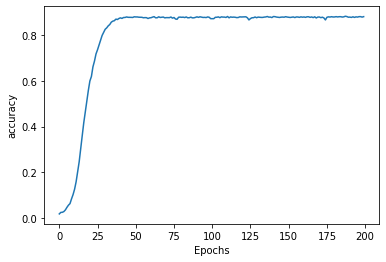

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_graphs(history,"accuracy")


Generate new Text

In [17]:
seed_text = "It was a cold night."

# add number of words to predict

next_words = 100

# run the loop to predict and concatenate the word

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')

  # predict the class using the trained model
  predicted = model.predict(token_list,verbose=0)
  y_classes = predicted.argmax(axis=-1)
  output_word=""
  for word,index in tokenizer.word_index.items():
    if index == y_classes:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)

It was a cold night. to decay prove night night whatsoever consider perceive trees woman's gracious did sight object woman's folly great featureless light's object farthest clear flattery eclipses sweetly present present sorry farthest farthest farthest unseen painter's silvered o'er think didst didst didst didst didst thou take thou gild'st the black even best thee her for me thee more express'd thought see thee you now see see lives glass eyes you young best see you young alone see me numbers thee thee alone any numbers brave churl beauties life's clear perceive perceive mine eyes numbers sweetly say unseeing good chief darkness nature nature flattery
